In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as mvn

%matplotlib inline

In [3]:


data_train = np.load('kmnist-train-imgs.npz', allow_pickle=True)
lst = data_train.files

#for item in lst:
#    print(item)
#    print(data_train[item])

In [4]:


data_test = np.load('kmnist-test-imgs.npz', allow_pickle=True)
lst = data_test.files

#for item in lst:
#    print(item)
#    print(data_test[item])

In [5]:


data_test_label = np.load('kmnist-test-labels.npz', allow_pickle=True)
lst = data_test_label.files

#for item in lst:
#    print(item)
#    print(data_test_label[item])

In [6]:


data_train_labels = np.load('kmnist-train-labels.npz', allow_pickle=True)
lst = data_train_labels.files

#for item in lst:
#    print(item)
#    print(data_train_labels[item])

In [7]:
train_data = np.load('kmnist-train-imgs.npz')['arr_0']

In [12]:
train_labels = np.load('kmnist-train-labels.npz')['arr_0']

In [13]:
test_data = np.load('kmnist-test-imgs.npz')['arr_0']

In [14]:
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [16]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [24]:
print(train_data[:,-1].shape)
X = train_data[:, -1]
X

(60000, 28)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0]], dtype=uint8)

In [25]:
print(train_labels.shape)
y = train_labels
y

(60000,)


array([8, 7, 0, ..., 0, 4, 9], dtype=uint8)

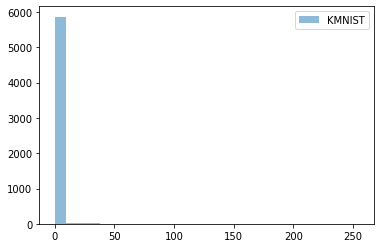

In [33]:
plt.figure()
plt.hist(X[y == 1,0], label = "KMNIST", alpha = 0.5, bins = 27)

plt.legend()

In [ ]:
# create a figure and axes 
fig, ax = plt.subplots() 
  
# setting title to graph 
ax.set_title('Example Graph') 
  
# label x-axis and y-axis 
ax.set_ylabel('y-AXIS') 
ax.set_xlabel('x-AXIS') 
  
# function to plot and show graph 
ax.plot(X, y) 
plt.show()

In [30]:
X
# create an index for each tick position
xi = list(range(len(X)))
y
plt.ylim(0.8,1.4)
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, X)
plt.title('compare')
plt.legend() 
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000128FD06BB80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
Should look into more visualation techinues, partically the ones he teased in class

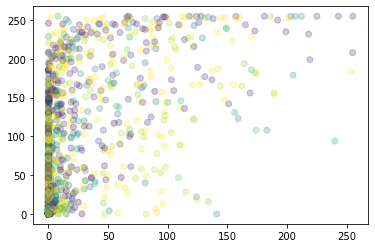

In [35]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.25)

In [ ]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis = 0), "cov":X_k.var(axis = 0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self, X):
        N,D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
        

In [ ]:
gnb = GaussNB()
gnb2 = GaussNB()
gnb.fit(X,y)
y_hat = gnb.predict(X)
def accuracy(y, y_hat):
    return np.mean(y == y_hat)
print(f"Accuracy : {accuracy(y, y_hat):0.3f}")

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [ ]:
B = np.array([[67, 158], [67, 170], [67, 175]])
gnb2.fit(X,y)
y_hat2 = gnb2.predict(B)
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], alpha = 0.89)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], c = y_hat2, alpha = 0.89)
y_test = np.array([[0], [1], [1]])
print(f"Accuracy : {accuracy(y_test, y_hat2):0.3f}")


In [ ]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis = 0)
            self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov":
                                  (1/(N_k - 1)) * np.matmul((X_k - mu_k).T, X_k - mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
    

In [ ]:
X2 = data2.to_numpy()
X2 = X2[1:,:]  # removing the first row of X
y2 = X2[:,-1]  # labels = last column of X
X2 = X2[:,:-1]  # removing last column, the label, from X

In [ ]:
gb = GaussBayes()

In [ ]:
gb.fit(X2,y2)
y2_hat = gb.predict(X2)

In [ ]:
class BernNB():
    def fit(self, X, y, epsilon = 1e-10):
        N, D = X.shape
        self.likelihoods = {}
        self.priors = {}
        self.K = set(y.astype(int))
        
        for k in self.K:
            x_k = X[y==k, :]
            p = (sum(X_k) + 1) / len(X_k) + 2)
            self.likelihood[k] = {'mean':p, 'cov': p * (1 - p) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        
        for k,l in self.likelihoods.items():
            # Using the Bernouli function/formula. Trick is to get the matrices/vectors to go from mxn to a 1x1 number for each k value.
            P_hat[:, k] = np.log(self.priors[k]) + np.matmul(X , np.log(1['mean'])) + np.matmul((1 - X ), np.log(abs(1 - l['mean'])) )
            
            
        
        

In [ ]:
bnb = BernNB()
bnb.fit(X_train, y_train) # Use the X and Y Training set here 
y_hat = bnb.predict(X_test)
print(accuracy(y_test, y_hat))


X[np.Where]

In [ ]:
#This is likely from somewhere elses Should revist

In [ ]:
class GaussBayes():
    def fit(self, X , y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        likehoods
        
        mean(axis=0)
        lihoods[k] = {"mean":X_k.mean(axis=0), "cov": 
                     (1/(N_k-1))*np.matmul((X_k-mu_k)+epsilon )}
        
        self.priors[k]= len(X_K)/len(X)
        
    def predict(self, X):
        N , D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.items():
                P_hat[:, k ] = mvn.logpdf( X, l["mean"], l["cov"]) + np.log(self.priors[k])
        
        return P_hat.argmax(axis=1)

In [ ]:
class GenBayes():
    
    def fit(self,X,y, DistStr, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        
        self.K = set(y.astype(int))
        
        if DistStr=="Gauss":
            
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                mu_k=X_k.mean(axis=0)
                self.likelihoods[k]={"mean":X_k.mean(axis=0),
                                     "cov":(1/(N_k-1))*
                                     np.matmul((X_k-mu_k).T,X_k-mu_k)+
                                     epsilon*np.identity(D)}
                self.priors[k] = len(X_k)/len(X)
                
        if DistStr =="Multinomial":
            
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                mu_k = X_k.mean(axis=0)
                self.likelihoods[k]={"N":N, "P":sum(N_k/len(X))}
                self.priors[k] = len(X_k)/len(X)
                
        if DistStr == "Bernoulli":
            for k in self.K:
                X_k = X[y==k,:]
                N_k, D = X_k.shape
                
                self.likelihoods[k] = {"P":N_k/len(X)}
                self.priors[k] = len(X_k)/len(X)
    
    def predict(self, x, DistStr):
        
        N, D = X.shape
        
        if DistStr =="Gauss":
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.items():
                P_hat[:,k] = MVN.log(self.priors[k])
                +np.log(self.priors[k])
            return P_hat.argmax(axis=1)
        if DistStr == "Multinomial":
            P_hat = np.zeros((N, len(self.k)))
            
            for k, l in self.likelihoods.items():
                P_hat[:, k] = mlvn.logpdf(X, l["N"], l["P"])
                +np.log(self.priors[k])
                
            return P_hat.argmax(axis=1)
        
        if DistStr == "Bernoulli":
            P_hat = np.zeros((N, len(self.K)))
            
            for k, l in self.likelihoods.item():
                P_hat[:, k] = bernoulli.logpdf(X, l["P"]) + np.log(self.priors[k])
            return P_hat.argmax(axis = 1)
        
        
    
        
    

In [ ]:
# might have miss some/lot from that last one 
#GaussNB
#GaussBayesb

#BernNB
#GeneralBayes 
